In [35]:
library(Seurat)
library(stringr)
library(dplyr)
library(data.table)

In [36]:
# R.version.string

[1] "R version 4.4.2 (2024-10-31)"

In [37]:
# GSE135893_ILD_annotated_fullsize <- readRDS("/home/dhakal/JBNU_Hospital_URT/GSE135893_ILD_annotated_fullsize.rds")

In [38]:
# GSE135893_ILD_annotated_fullsize

In [39]:
# sce <- CreateSeuratObject(counts = GetAssayData(GSE135893_ILD_annotated_fullsize, slot = "counts"))
# sce$orig.ident <- FetchData(GSE135893_ILD_annotated_fullsize, vars = "orig.ident")[,1]
# sce$Diagnosis <- FetchData(GSE135893_ILD_annotated_fullsize, vars = "Diagnosis")[,1]
# sce$Sample_Name <- FetchData(GSE135893_ILD_annotated_fullsize, vars = "Sample_Name")[,1]
# sce$Status <- FetchData(GSE135893_ILD_annotated_fullsize, vars = "Status")[,1]

In [40]:
# # Filter for Control and IPF samples
# subsce <- subset(sce, Diagnosis == "Control" | Diagnosis == "IPF")
# saveRDS(subsce, "sce.rds")

In [41]:
# View(subsce)

An object of class Seurat 
26377 features across 89326 samples within 1 assay 
Active assay: RNA (26377 features, 0 variable features)
 1 layer present: counts

In [42]:
# # Normalize, find variable features, scale data
# sce <- NormalizeData(sce, verbose = FALSE)
# sce <- FindVariableFeatures(sce, selection.method = "vst")
# sce <- ScaleData(sce, verbose = FALSE)
# sce <- RunPCA(sce, npcs = 30, verbose = FALSE)

Finding variable features for layer counts



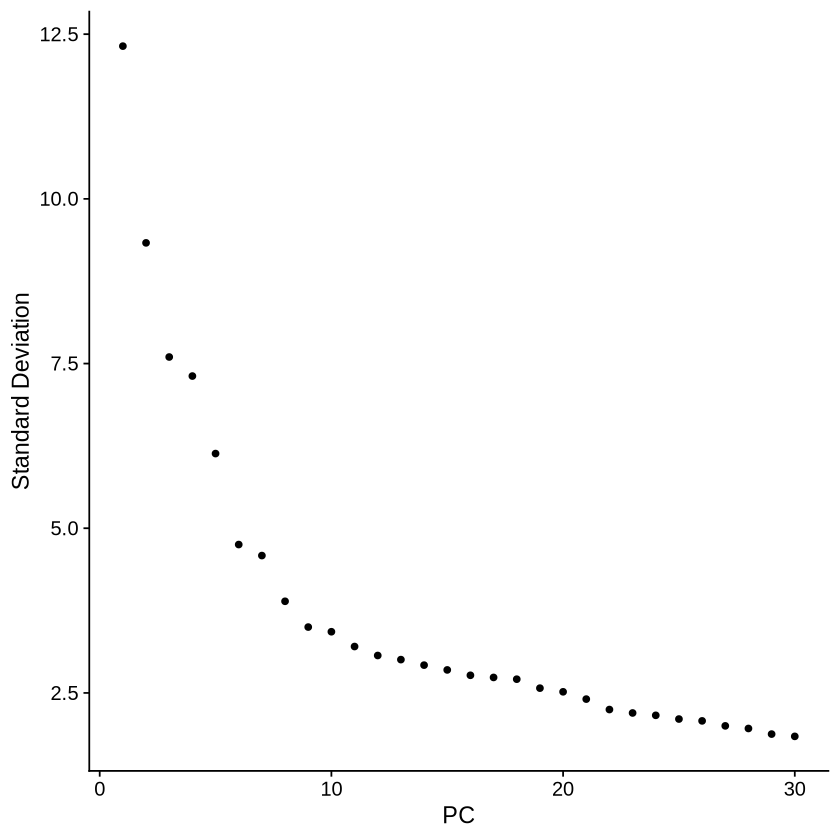

In [ ]:
# ElbowPlot(sce, ndims = 30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:29:28 UMAP embedding parameters a = 0.9922 b = 1.112

10:29:28 Read 114396 rows and found 30 numeric columns

10:29:28 Using Annoy for neighbor search, n_neighbors = 30

10:29:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:29:42 Writing NN index file to temp file /tmp/Rtmp16Wop8/file4b8de01e8ef

10:29:42 Searching Annoy index using 1 thread, search_k = 3000

10:30:16 Annoy recall = 100%

10:30:16 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 114396
Number of edges: 3844326

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9431
Number of communities: 27
Elapsed time: 52 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



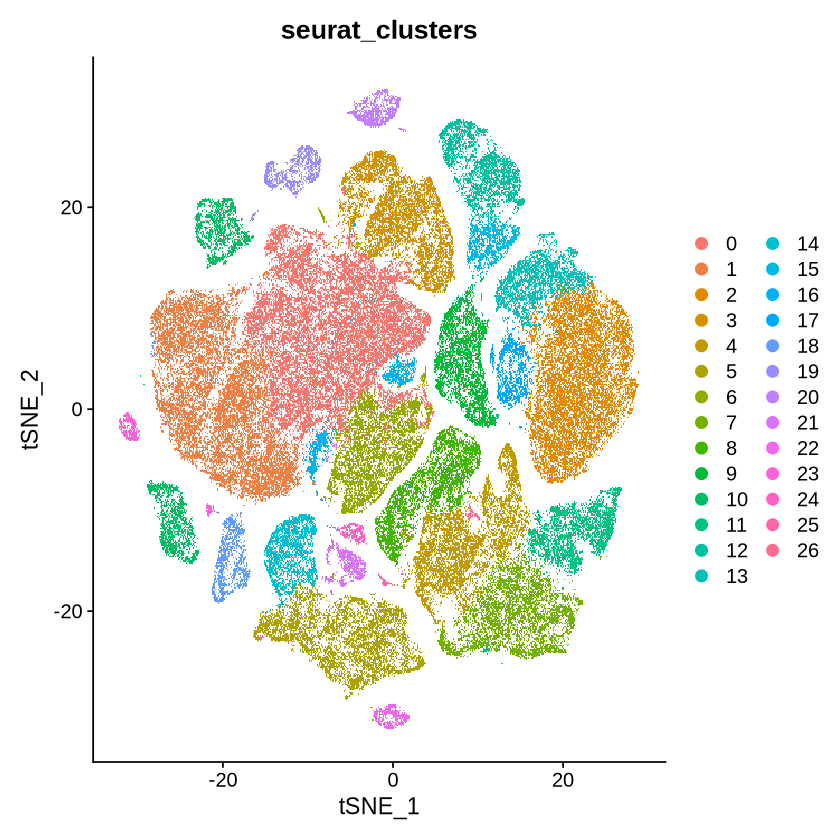

In [ ]:
# sce<- RunUMAP(sce, reduction = "pca", dims = 1:30)
# sce <- RunTSNE(sce, reduction = "pca", dims = 1:30)
# sce <- FindNeighbors(sce, dims = 1:30)
# sce <- FindClusters(sce, resolution = 0.5)
# DimPlot(sce, reduction = "tsne", group.by = "seurat_clusters")

In [ ]:
# expr_data<-GetAssayData(sce, slot = "data")
# expr_data <- as.data.frame(t(as.matrix(expr_data)))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 22.5 GiB”


In [ ]:
# expr_data$Diagnosis <- sce$Diagnosis

In [ ]:
# write.csv(expr_data, "Control_vs_IPF_data.csv", row.names = TRUE)

In [43]:
library(dplyr)
library(ggplot2)

In [44]:
# Read the CSV file
data <- read.csv("Control_vs_IPF_data.csv", row.names = 1)

In [45]:
# Check the structure of the data
summary(data)

  RP11.34P13.3        RP11.34P13.7       RP11.34P13.14      
 Min.   :0.0000000   Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0000000   1st Qu.:0.0000000   1st Qu.:0.0000000  
 Median :0.0000000   Median :0.0000000   Median :0.0000000  
   FO538757.3          FO538757.2       AP006222.2        RP4.669L17.2     
 Min.   :0.0000000   Min.   :0.0000   Min.   :0.000000   Min.   :0.000000  
 1st Qu.:0.0000000   1st Qu.:0.0000   1st Qu.:0.000000   1st Qu.:0.000000  
 Median :0.0000000   Median :0.0000   Median :0.000000   Median :0.000000  
 RP4.669L17.10       RP5.857K21.4       RP11.206L10.9         FAM87B        
 Min.   :0.000000   Min.   :0.0000000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.000000   1st Qu.:0.0000000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.000000   Median :0.0000000   Median :0.00000   Median :0.000000  
   LINC00115           FAM41C          RP11.54O7.16        RP11.54O7.1       
 Min.   :0.00000   Min.   :0.000000   Min.   :0.0000000   Min.   :

In [46]:
head(data)

,RP11.34P13.3,RP11.34P13.7,RP11.34P13.14,FO538757.3,FO538757.2,AP006222.2,RP4.669L17.2,RP4.669L17.10,RP5.857K21.4,RP11.206L10.9,⋯,AC007325.1,AC007325.4,AC007325.2,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,Diagnosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F00431_AGAGCTTGTAGAGGAA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.0000000,0,0,0.000000,0,0,0,IPF
F01380_GATCTAGTCTTGCCGT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.0000000,0,0,0.000000,0,0,0,IPF
F01391_AGTCTTTAGGTTACCT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.8185749,0,0,0.000000,0,0,0,IPF
F01391_ATCCACCAGGAGTCTG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.0000000,0,0,0.000000,0,0,0,IPF
F01391_CTCGTCATCATCTGCC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.8205633,0,0,0.000000,0,0,0,IPF
F01391_CTGATAGCAGACGCCT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0.7816684,0,0,1.214981,0,0,0,IPF


In [47]:
table(data$Diagnosis)


               cHP            Control                IPF               NSIP 
              7535              31644              57682               8638 
       sacroidosis Unclassifiable ILD 
              4891               4006 

1. cHP (Chronic Hypersensitivity Pneumonitis): 7,535 cells.
2. Control: 31,644 cells, representing healthy individuals used as controls.
3. IPF (Idiopathic Pulmonary Fibrosis): 57,682 cells, a key focus in your classification task.
4. NSIP (Nonspecific Interstitial Pneumonia): 8,638 cells.
5. Sarcoidosis: 4,891 cells.
7. Unclassifiable ILD (Interstitial Lung Disease): 4,006 cells that couldn't be categorized under a specific ILD.


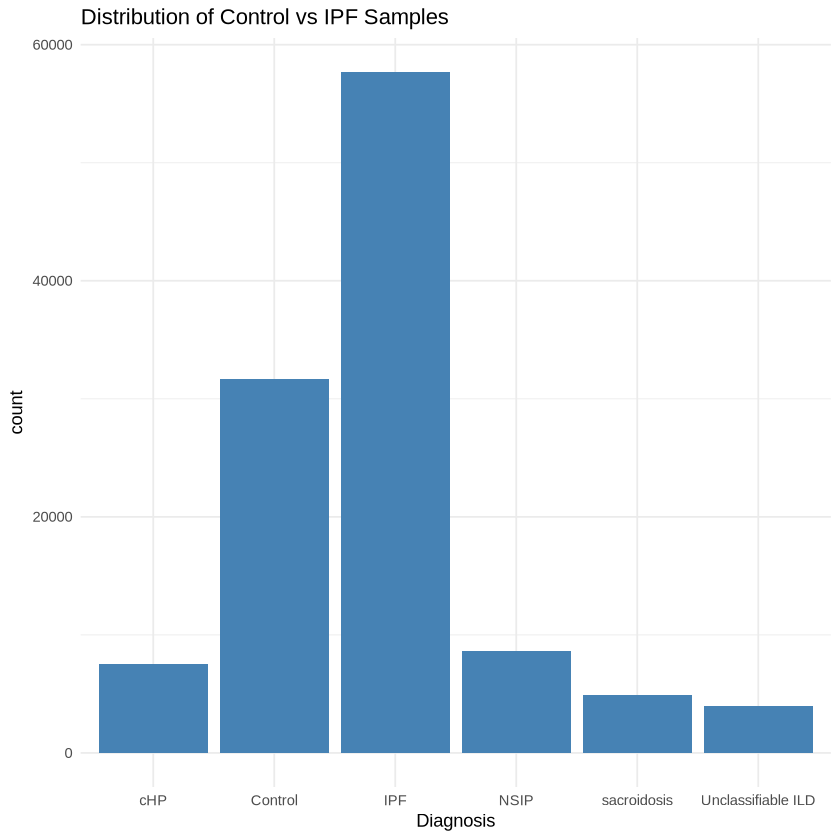

In [48]:
# Visualize the distribution of classes
ggplot(data, aes(x = Diagnosis)) +
  geom_bar(fill = "steelblue") +
  ggtitle("Distribution of Control vs IPF Samples") +
  theme_minimal()